In [36]:
import pandas as pd
import os
from env import username, host, password
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_connection(db, user=username, host=host, password=password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_zillow_data():
   
    sql_query = """
                select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, 
                taxvaluedollarcnt, yearbuilt, taxamount, fips  from properties_2017
                WHERE propertylandusetypeid = 261;
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    return df

def get_zillow_data():
    
    if os.path.isfile('zillow.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_zillow_data()
        
        # Cache data
        df.to_csv('zillow.csv')
        
    return df

In [44]:
df = get_zillow_data()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [45]:
df = df.dropna()

In [46]:
df.value_counts()

bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  taxvaluedollarcnt  yearbuilt  taxamount  fips  
3.0         1.0          1002.0                        39230.0            1962.0     419.14     6111.0    21
2.0         2.5          1008.0                        101575.0           1988.0     1450.58    6059.0    16
4.0         3.0          2539.0                        678000.0           2005.0     9094.20    6059.0    14
3.0         2.5          1358.0                        194027.0           2000.0     2317.92    6111.0    14
                         2060.0                        455635.0           2007.0     5271.34    6059.0    13
                                                                                                          ..
            2.0          1312.0                        55069.0            1954.0     874.62     6059.0     1
                                                       54603.0            1963.0     857.48     6059.0     1
                         

In [47]:
cols = ['bedroomcnt', 'calculatedfinishedsquarefeet',
        'yearbuilt']
cols

['bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']

In [50]:
df[cols] = df[cols].astype('int')
df.fips = (df.fips * 10).astype('object')

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

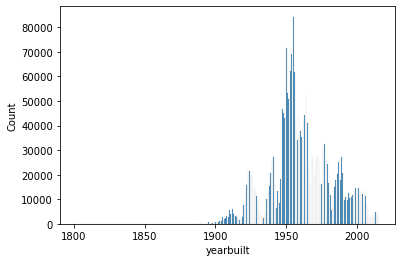

In [49]:
sns.histplot(data=df, x='yearbuilt')